In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as splt
import seaborn as sns 
import numpy as np

# Loading in Olympic data
olympics_path = "../datasources/athlete_events.csv"
noc_path = "../datasources/noc_regions.csv"
census_path = "../datasources/internationalcensus.csv"
gdp_path = "../datasources/internationalgdp.csv"

# Read the cleaned olympic data in cleandata folder

olympics_df = pd.read_csv(olympics_path)

# Read the country data in the NOC file located in datasources folder
noc_df = pd.read_csv(noc_path)

# Read the census data and rename column for smooth merge
census_df = pd.read_csv(census_path)
census_df = census_df.rename(columns ={"Country/Area Name":"region"})

# Read the gdp data, rename column for smooth merge, drop unnecessary columns, melt for ease of merge, change Year column to integer
gdp_df = pd.read_csv(gdp_path)
gdp_df= gdp_df.rename(columns ={"Country Name":"region"})
gdp_df = gdp_df.drop(["Country Code","Indicator Name","Indicator Code"], axis=1)
gdp_df = pd.melt(gdp_df,'region',var_name='Year',value_name='GDP')
gdp_df["Year"]=gdp_df["Year"].astype(int)

In [2]:
# merge clean_df and noc_regions by NOC
merge_df = pd.merge(olympics_df, noc_df, on="NOC")

# merge merge_df and international census data by country and year
merge2_df = pd.merge(merge_df, census_df, on=["region","Year"], how = "inner")

# merge merge2_df and gdp data by country and year

merge3_df = pd.merge(merge2_df, gdp_df, on=["region","Year"])

# Removing columns notes, Annual Growth Rate %, Density (per sq km),Total Fertility Rate, Life Expectancy at Birth, Under-5 Mortality Rate
olympiccountries_df = merge3_df.drop(["notes","Annual Growth Rate %", "Density (per sq km)","Total Fertility Rate", "Life Expectancy at Birth", "Under-5 Mortality Rate"], axis=1)
olympiccountries_df.head(10)
olympiccountries_df.set_index("ID")

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,...,Sport,Event,Medal,region,Row,FIPS,GENC,Population,Area (sq km),GDP
ID,,,,,,,,,,,,,,,,,,,,,
1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,...,Basketball,Basketball Men's Basketball,NaN,China,6234,CH,CN,1182230625,9326410,4.269160e+11
6848,Bai Chongguang,M,21.0,184.0,83.0,China,CHN,1992 Summer,1992,Summer,...,Boxing,Boxing Men's Light-Heavyweight,NaN,China,6234,CH,CN,1182230625,9326410,4.269160e+11
6854,Bai Mei,F,17.0,166.0,46.0,China,CHN,1992 Summer,1992,Summer,...,Rhythmic Gymnastics,Rhythmic Gymnastics Women's Individual,NaN,China,6234,CH,CN,1182230625,9326410,4.269160e+11
11225,Bi Zhong,M,23.0,188.0,110.0,China,CHN,1992 Summer,1992,Summer,...,Athletics,Athletics Men's Hammer Throw,NaN,China,6234,CH,CN,1182230625,9326410,4.269160e+11
17295,Cai Yanshu,M,28.0,169.0,79.0,China,CHN,1992 Summer,1992,Summer,...,Weightlifting,Weightlifting Men's Light-Heavyweight,NaN,China,6234,CH,CN,1182230625,9326410,4.269160e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87277,Frans Ntaole,M,33.0,168.0,62.0,Lesotho,LES,1984 Summer,1984,Summer,...,Athletics,Athletics Men's Marathon,NaN,Lesotho,17400,LT,LS,1519492,30355,3.331585e+08
98490,Gabashane Vincent Rakabaele,M,35.0,163.0,54.0,Lesotho,LES,1984 Summer,1984,Summer,...,Athletics,Athletics Men's Marathon,NaN,Lesotho,17400,LT,LS,1519492,30355,3.331585e+08
122215,Lefa Tsapi,M,23.0,170.0,63.0,Lesotho,LES,1984 Summer,1984,Summer,...,Boxing,Boxing Men's Welterweight,NaN,Lesotho,17400,LT,LS,1519492,30355,3.331585e+08


In [3]:
olympiccountries_df.to_csv("clean_df")

In [4]:
olympiccountries_df.dtypes

ID                int64
Name             object
Sex              object
Age             float64
Height          float64
Weight          float64
Team             object
NOC              object
Games            object
Year              int64
Season           object
City             object
Sport            object
Event            object
Medal            object
region           object
Row               int64
FIPS             object
GENC             object
Population        int64
Area (sq km)      int64
GDP             float64
dtype: object

<AxesSubplot:xlabel='Team'>

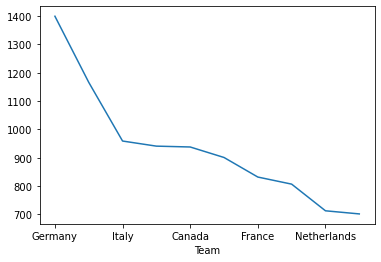

In [5]:
Count_basedonmedals=(olympiccountries_df.groupby(["Team"]).count()["Medal"])
Count_basedonmedals.sort_values(ascending=False).head(10).plot()


<AxesSubplot:xlabel='Team'>

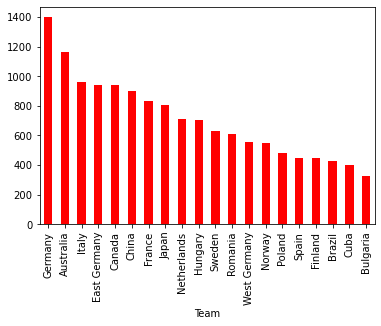

In [6]:
Count_basedonmedals=(olympiccountries_df.groupby(["Team"]).count()["Medal"])
Count_basedonmedals.sort_values(ascending=False).head(20).plot(kind='bar', color='r')




In [52]:
China=olympiccountries_df[olympiccountries_df["Team"].str.contains('France', na=False)]
China["GDP"]=China["GDP"].astype(int)
China=China.drop_duplicates(subset=["Year"], keep="first")
China

<ipython-input-52-624f4ee5c560>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  China["GDP"]=China["GDP"].astype(int)


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,...,Sport,Event,Medal,region,Row,FIPS,GENC,Population,Area (sq km),GDP
22248,34,Jamale (Djamel-) Aarrass (Ahrass-),M,30.0,187.0,76.0,France,FRA,2012 Summer,2012,...,Athletics,"Athletics Men's 1,500 metres",NaN,France,10482,FR,FR,65638922,640427,2683830000000
22674,52,Patrick Abada,M,22.0,189.0,80.0,France,FRA,1976 Summer,1976,...,Athletics,Athletics Men's Pole Vault,NaN,France,10446,FR,FR,54203213,640427,372319000000
23035,73,Luc Abalo,M,23.0,182.0,86.0,France,FRA,2008 Summer,2008,...,Handball,Handball Men's Handball,Gold,France,10478,FR,FR,64213993,640427,2918380000000
23483,73,Luc Abalo,M,31.0,182.0,86.0,France,FRA,2016 Summer,2016,...,Handball,Handball Men's Handball,Silver,France,10486,FR,FR,66857439,640427,2471290000000
23995,93,Jol Marc Abati,M,34.0,190.0,85.0,France,FRA,2004 Summer,2004,...,Handball,Handball Men's Handball,NaN,France,10474,FR,FR,62673046,640427,2115740000000
24456,434,David Abibssira,M,21.0,179.0,63.0,France,FRA,1984 Summer,1984,...,Shooting,"Shooting Men's Running Target, 50 metres",NaN,France,10454,FR,FR,56312924,640427,530684000000
24867,448,Sarah Abitbol,F,22.0,150.0,43.0,France-1,FRA,1998 Winter,1998,...,Figure Skating,Figure Skating Mixed Pairs,NaN,France,10468,FR,FR,60640400,640427,1503110000000
25026,515,Stphan Abrahamian Gonzalez,M,22.0,NaN,NaN,France,FRA,1968 Summer,1968,...,Cycling,"Cycling Men's Road Race, Individual",NaN,France,10438,FR,FR,51068762,640427,129785000000
25455,558,David Abrard,M,19.0,187.0,81.0,France,FRA,1996 Summer,1996,...,Swimming,Swimming Men's 200 metres Butterfly,NaN,France,10466,FR,FR,60092497,640427,1605680000000
25908,573,Franck Abrial,M,24.0,174.0,68.0,France,FRA,1988 Summer,1988,...,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,France,10458,FR,FR,57335273,640427,1018850000000


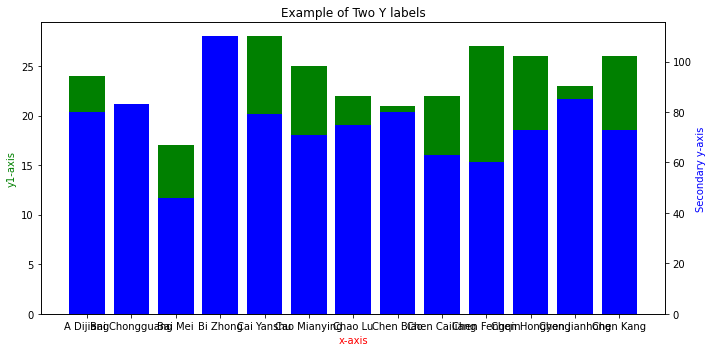

In [21]:

# creating data for plot
# data arrangement between 0 and 50 with the difference of 2
# x-axis values
x = olympiccountries_df["Name"].head(15)
  
#y-axis values
y1 = olympiccountries_df["Age"].head(15)
  
# secondary y-axis values
y2 = olympiccountries_df["Weight"].head(15)
  
# plotting figures by creating aexs object
# using subplots() function
fig, ax = splt.subplots(figsize = (10, 5))
splt.title('Example of Two Y labels')
  
# using the twinx() for creating 
# another axes object for secondry y-Axis
ax2 = ax.twinx()
# creating a bar plot
ax.bar(x, y1, color = 'g')
ax2.bar(x, y2, color = 'b')
  
# giving labels to the axises
ax.set_xlabel('x-axis', color = 'r')
ax.set_ylabel('y1-axis', color = 'g')
  
# secondary y-axis label
ax2.set_ylabel('Secondary y-axis', color = 'b')
  
# defining display layout
splt.tight_layout()
  
# show plot
splt.show()

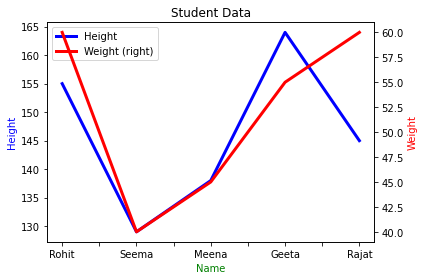

In [11]:
dataset = pd.DataFrame({'Name':['Rohit', 'Seema', 
                                'Meena', 'Geeta',
                                'Rajat'],
                          
                   'Height': [155,129,138,164,145],
                   'Weight': [60,40,45,55,60]})
  
# creating axes object and defining plot
ax = dataset.plot(kind = 'line', x = 'Name',
                  y = 'Height', color = 'Blue',
                  linewidth = 3)
  
ax2 = dataset.plot(kind = 'line', x = 'Name', 
                   y = 'Weight', secondary_y = True,
                   color = 'Red',  linewidth = 3,
                   ax = ax)
  
#title of the plot
splt.title("Student Data")
  
#labeling x and y-axis
ax.set_xlabel('Name', color = 'g')
ax.set_ylabel('Height', color = "b")
ax2.set_ylabel('Weight', color = 'r')
  
#defining display layout 
splt.tight_layout()
  
#show plot
splt.show()

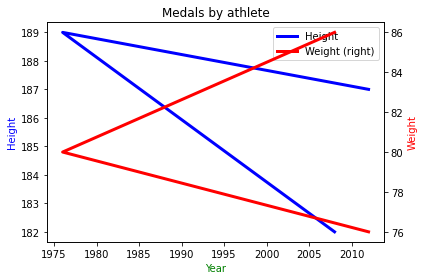

In [54]:
ax = China.head(3).plot(kind = 'line', x = 'Year',
                  y = 'Height', color = 'Blue',
                  linewidth = 3)
  
ax2 = China.head(3).plot(kind = 'line', x = 'Year', 
                   y = 'Weight', secondary_y = True,
                   color = 'Red',  linewidth = 3,
                   ax = ax)
  
#title of the plot
splt.title("Medals by athlete")
  
#labeling x and y-axis
ax.set_xlabel('Year', color = 'g')
ax.set_ylabel('Height', color = "b")
ax2.set_ylabel('Weight', color = 'r')
  
#defining display layout 
splt.tight_layout()
  
#show plot
splt.show()

In [33]:
olympiccountries_df.Year.nunique()

21